# <font  color = 'orange'> **Aplicando métodos no supervisados** </font>


##   <font  color = 'orange'>  1. Configuracion del ambiente  </font>

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.cluster import KMeans

drive.mount('/content/drive/')

pd.set_option('display.max_columns', None)
sns.set_theme(style="darkgrid", palette="twilight")


path = '/content/drive/MyDrive/data sets/bootcamp/challenge/'

Mounted at /content/drive/


## <font  color = 'orange'> 2. Obtencion de los datos  </font>
---

In [2]:
name = 'media prediction and its cost.csv'
data = pd.read_csv(path + name)
data.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

> Inicialmente no contamos con valores nulos.

### <font  color = 'orange'> Traduciendo los datos </font>
---

Creando una funcion que regresa un DataFrame con los datos traducidos.

In [4]:
import sys
sys.path.append(path)
import diccionarios

def traduccion_datos(data):

  data_copy = data.copy()
  # Renombrando columnas
  data_copy.rename(columns = diccionarios.columnas, inplace= True)
  # Traduccion de las variables categóricas
  columnas_nombres = data_copy.select_dtypes('object').columns
  for columna in columnas_nombres:
    if hasattr(diccionarios, columna):
      diccionario = getattr(diccionarios, columna)
      data_copy[columna] = data_copy[columna].map(diccionario)

  return data_copy

In [5]:
data_copy = traduccion_datos(data)
data_copy.sample(3)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,hijos_en_casa,promedio_autos(aprox)_1,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,tipo_tienda,ciudad_tienda,estado_tienda,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
10580,Productos lácteos,Productos lácteos,Comida,5.52,1.7664,2.0,Rebajadores de precios,Estados Unidos,Casado,Masculino,1.0,Superior,Bronce,Gestión,Sí,2.0,80000,1.0,2.0,Booker,2.76,13.8,11.8,1.0,1.0,16.0,Supermercado,Seattle,WA,21215.0,13305.0,4746.0,3164.0,1.0,0.0,0.0,0.0,0.0,Radio,76.98
33101,Sopa enlatada,Alimentos enlatados,Comida,2.60,1.1700,2.0,Ahorradores de dinero,Estados Unidos,Casado,Femenino,3.0,Superior,Oro,Profesional,Sí,3.0,60000,3.0,3.0,Pleasant,1.30,20.5,18.5,0.0,1.0,33.0,Supermercado,Bremerton,WA,39696.0,24390.0,9184.0,6122.0,0.0,0.0,1.0,1.0,0.0,"Periódico dominical, radio, televisión",82.61
28635,Eléctrico,Artículos para el hogar,No comestible,5.76,1.7280,3.0,Gratis para todos,Estados Unidos,Casado,Masculino,3.0,Secundaria,Bronce,Obrero,Sí,4.0,40000,1.0,4.0,Denny,1.92,20.0,18.0,1.0,0.0,14.0,Supermercado,Portland,OR,20319.0,16232.0,2452.0,1635.0,0.0,0.0,0.0,0.0,0.0,Periódico diario,52.06


> Los datos se han traducido de manera correcta!

In [6]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             60428 non-null  object 
 1   departamento                   60428 non-null  object 
 2   tipo                           60428 non-null  object 
 3   ventas_tienda(en millones)     60428 non-null  float64
 4   costo_tienda(en millones)      60428 non-null  float64
 5   ventas_unitarias(en millones)  60428 non-null  float64
 6   promocion                      60428 non-null  object 
 7   pais                           60428 non-null  object 
 8   estado_civil                   60428 non-null  object 
 9   genero                         60428 non-null  object 
 10  total_de_hijos                 60428 non-null  float64
 11  escolaridad                    60428 non-null  object 
 12  miembro                        46561 non-null 

>Después de haber realizado la correspondiente traducción notamos que ahora la columna *miembros* posee valores nulos.

Checando posible columna repetida

In [7]:
(data_copy['promedio_autos(aprox)_1'] == data_copy['promedio_autos(aprox)']).sum() == data_copy.shape[0]

True

In [8]:
data_copy.drop(columns=['promedio_autos(aprox)_1'], inplace=True)

Agregando realismo al dataset

In [9]:
data_copy.ingreso_anual.value_counts()

ingreso_anual
40000     19514
20000     12959
60000     10493
80000      7544
140000     3410
100000     2737
120000     2590
160000     1181
Name: count, dtype: int64

In [10]:
import random
from numpy.random import seed
seed(321)

forty = random.sample(range(30000,50000),19514)
twenty = random.sample(range(10000,30000), 12959)
sixty = random. sample(range(50000,70000), 10493)
eighty = random.sample(range(70000,90000),7544)
hundredforty = random.sample(range(130000,150000), 3410)
hundred = random.sample(range(90000,110000), 2737)
hundredtventy = random.sample(range(110000,130000),2590)
hundredptus = random.sample(range(150000,250000), 1181)

In [11]:
ingresos_reales = (forty + twenty + sixty + eighty + hundredforty + hundred + hundredtventy + hundredptus)
ingresos_reales = [5*(ingreso//5) for ingreso in ingresos_reales]
data_copy.sort_values(by='ingreso_anual', inplace=True)
data_copy['ingreso_real'] = ingresos_reales

Guardamos despues de haber traducido el conjunto de datos.

In [12]:
data_copy.to_csv(path+'datos_clientes.csv', index=False)

## <font  color = 'orange'> 3. Análisis exploratorio </font>
---


### Visualizando los datos

In [13]:
datos = pd.read_csv(path + 'datos_clientes.csv')

In [14]:
def plot_count(data, x:str, hue= '',per = True, fs_per=12):

  title = f'Total de {hue.capitalize()} por {x.capitalize()}' if len(hue)> 0 else  f'Total por {x.capitalize()}'
  hue_tmp = None if len(hue) == 0 else hue

  plt.figure(figsize=(16,6))
  grafico = sns.countplot(data=datos, x = x, hue=hue_tmp)
  grafico.set_title(title, fontsize = 14)
  grafico.set_xlabel(f'{x.capitalize()}', fontsize=12)
  grafico.set_ylabel('Total', fontsize = 12)

  if per == True:
    sizes = []
    for p in grafico.patches:
      if p.get_height() > 0:
        height = p.get_height()
        sizes.append(height)
        grafico.text(p.get_x() + p.get_width()/1.85, height + 200,
                      f'{round(100*height/len(datos),2)}%',
                      ha = 'center', va= 'bottom', fontsize = fs_per)
    grafico.set_ylim(0,max(sizes)*1.2)

  grafico;

In [15]:
def plot_ingreso(data, x:str,y = 'ingreso_anual', hue= '',per = True, fs_per=12):
  # Añadir un posible filtro de datos
  y = y if y in data.columns else 'ingreso_anual'
  title = f'{y.capitalize()} de {hue.capitalize()} por {x.capitalize()}' if len(hue)> 0 else  f'{y.capitalize()} por {x.capitalize()}'
  hue_tmp = None if len(hue) == 0 else hue

  plt.figure(figsize=(16,6))
  grafico = sns.barplot(data=datos, x = x, y = y, hue=hue_tmp, errorbar=None)
  grafico.set_title(title, fontsize = 14)
  grafico.set_xlabel(f'{x.capitalize()}', fontsize=12)
  grafico.set_ylabel(f'Media {y.capitalize()}', fontsize = 12)

  if per == True:
    sizes = []
    for p in grafico.patches:
      if p.get_height() > 0:
        height = p.get_height()
        sizes.append(height)
        grafico.text(p.get_x() + p.get_width()/1.85, height + 1.5*(height/100),
                      f'{round(height,2)}',
                      ha = 'center', va= 'bottom', fontsize = fs_per)
    grafico.set_ylim(0,max(sizes)*1.2)

  grafico;

#### 1. Analizando por país

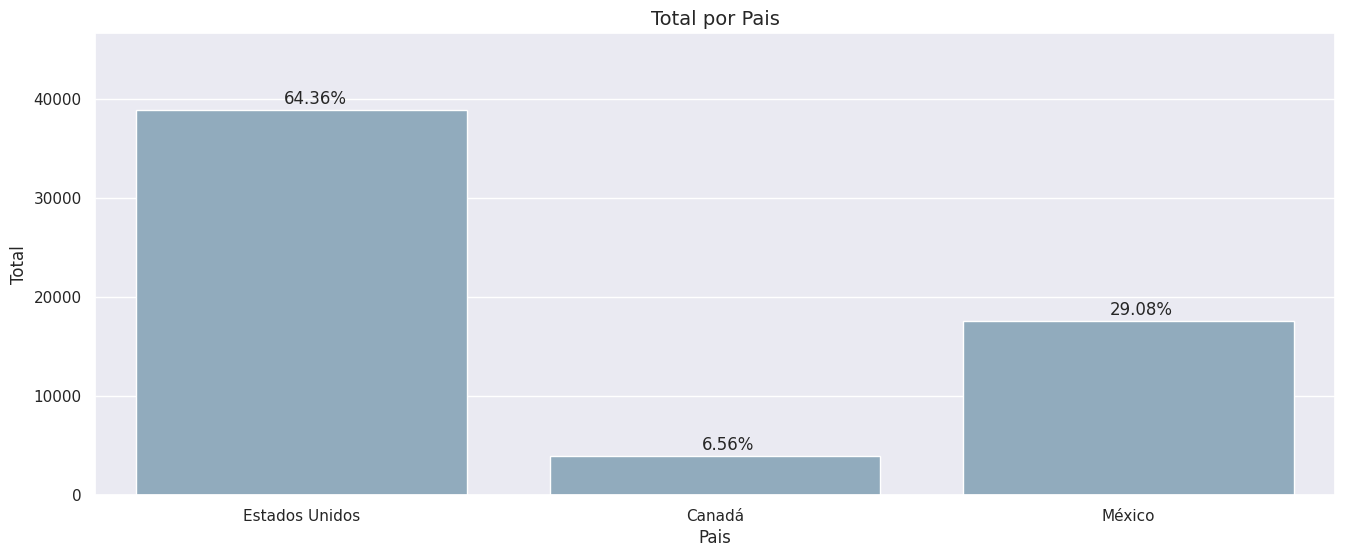

In [16]:
plot_count(datos, 'pais')

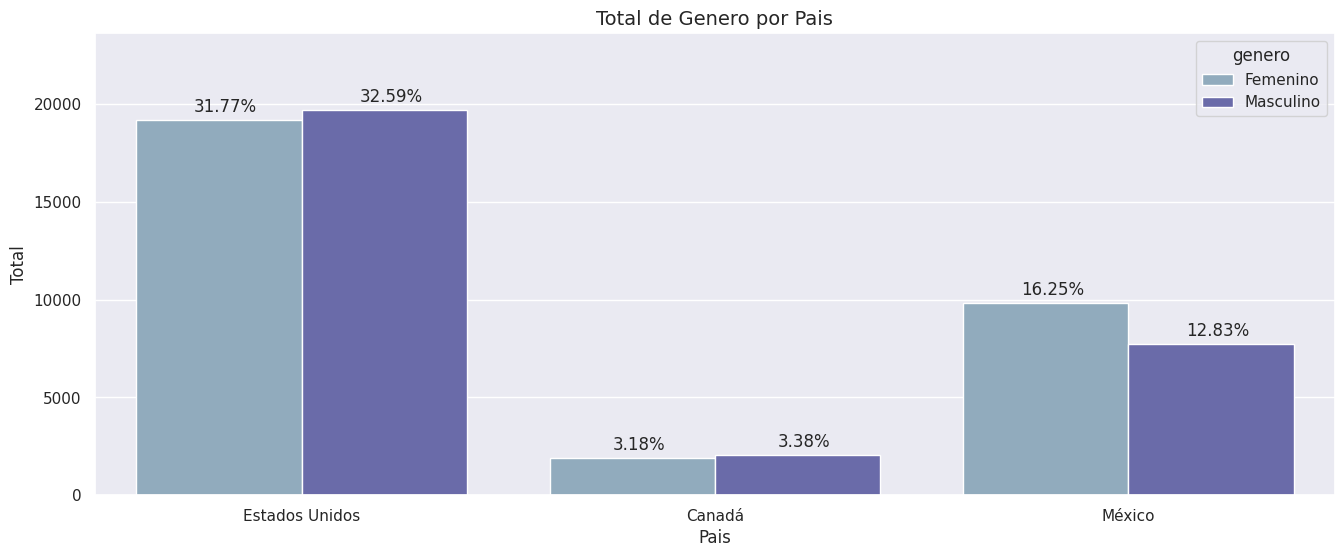

In [17]:
plot_count(datos, 'pais', 'genero')

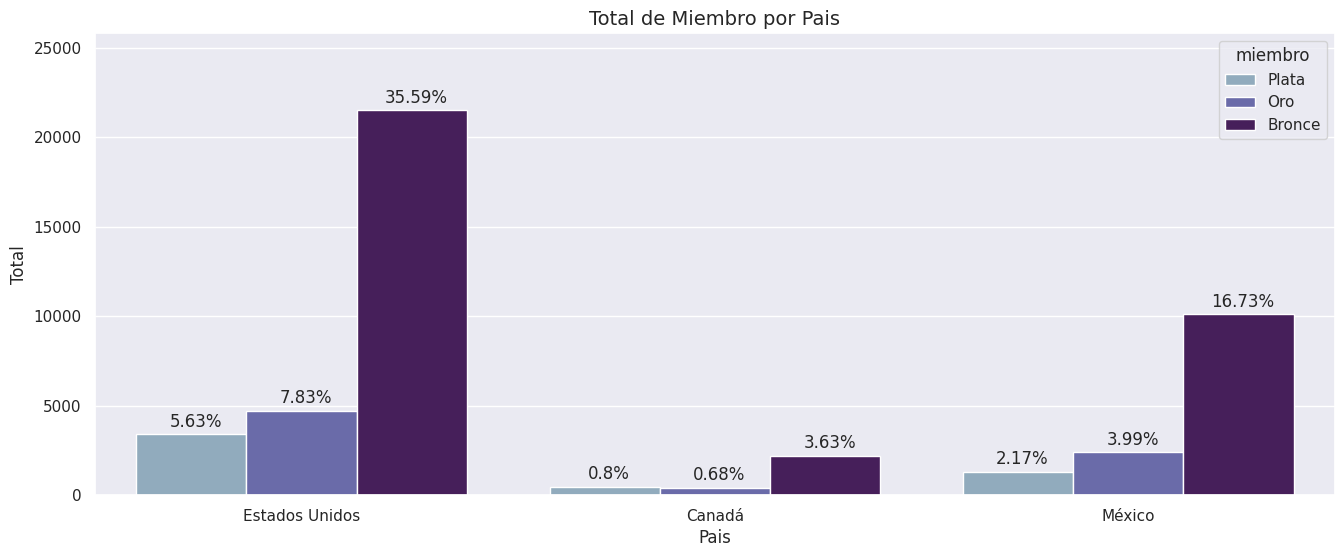

In [18]:
plot_count(datos, 'pais', 'miembro')

> Del grafico observamos los siguiente:
> * EUA concentra cerca del $50\%$ del total de los datos, siendo el
  que mayor prdomina entre México y Canadá.
> * Los miembros bronce son quienes mayor predominan en los tres paises.



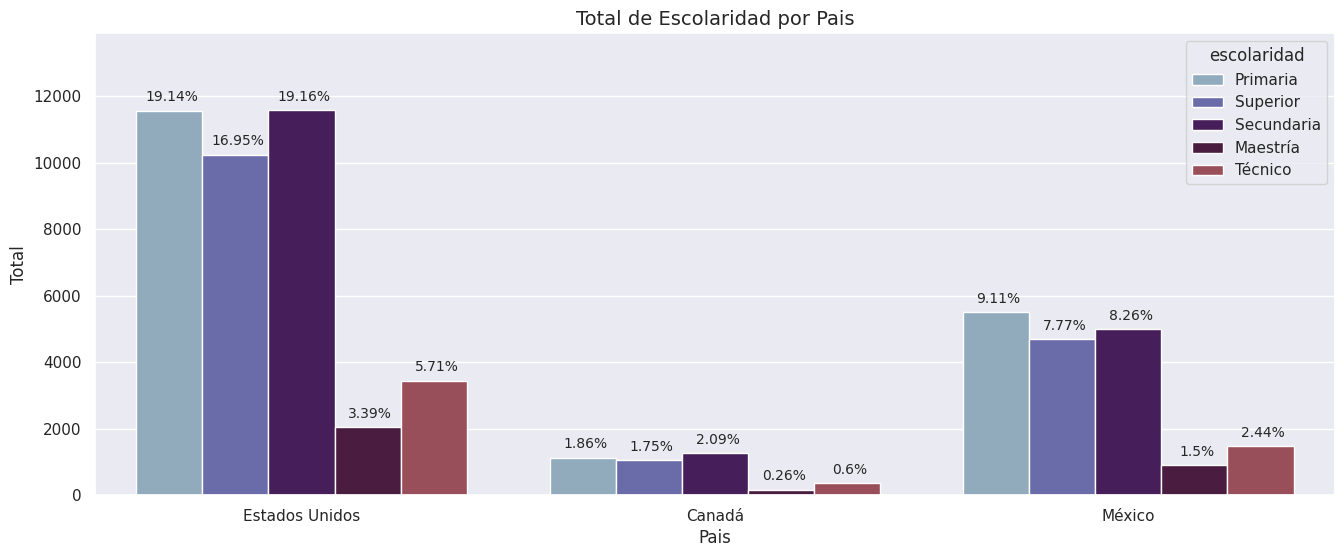

In [19]:
plot_count(datos, 'pais', 'escolaridad',fs_per =10)

> Notamos que en los tres paises las escolaridades *Primaria, Superior* y *Secundaria* son las que predominan en los tres paises.  

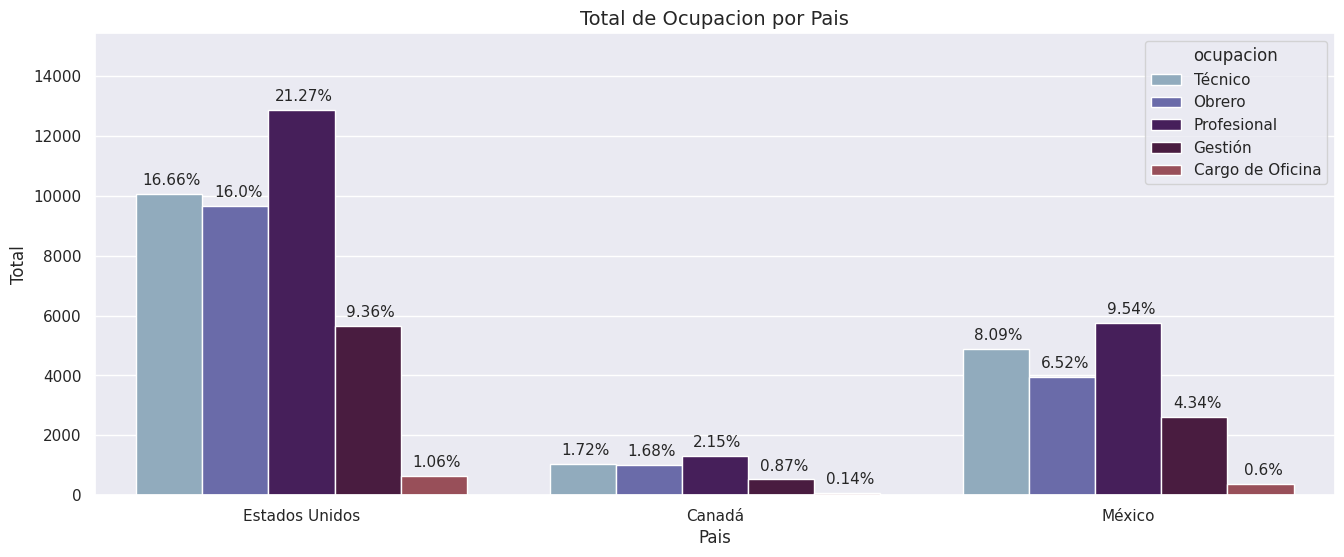

In [20]:
plot_count(datos,'pais', 'ocupacion',fs_per=11)

> Notamos que hay tres ocupaciones que predominan en los tres paises: *técnico, profesional* y *obrero*.

#### Analizando por miembro

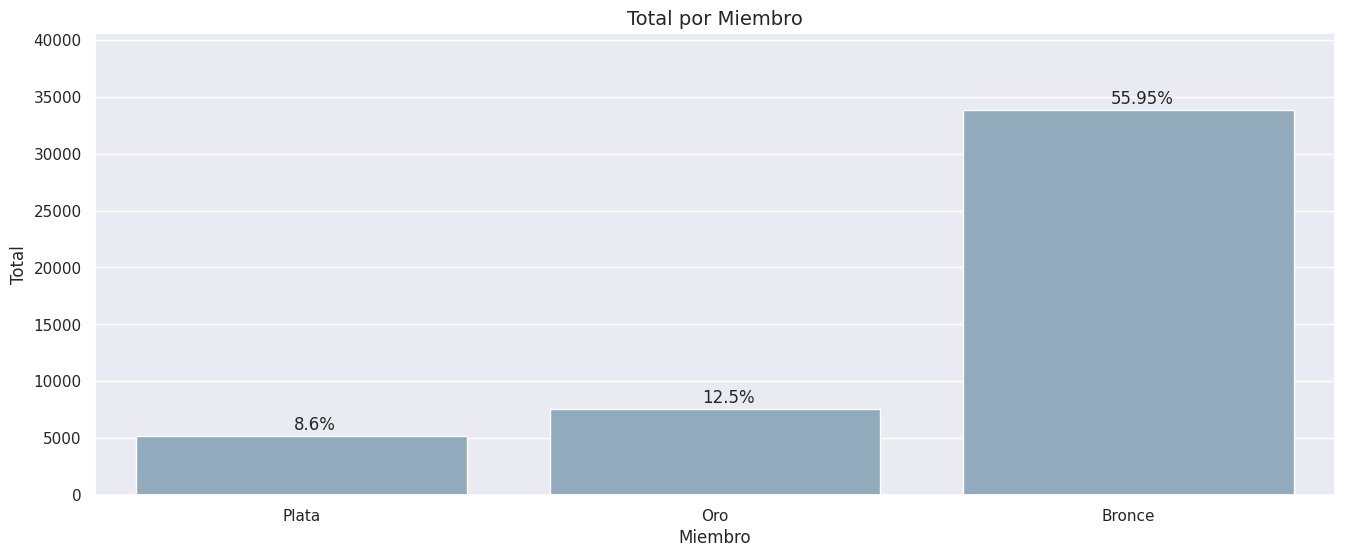

In [21]:
plot_count(datos, 'miembro')

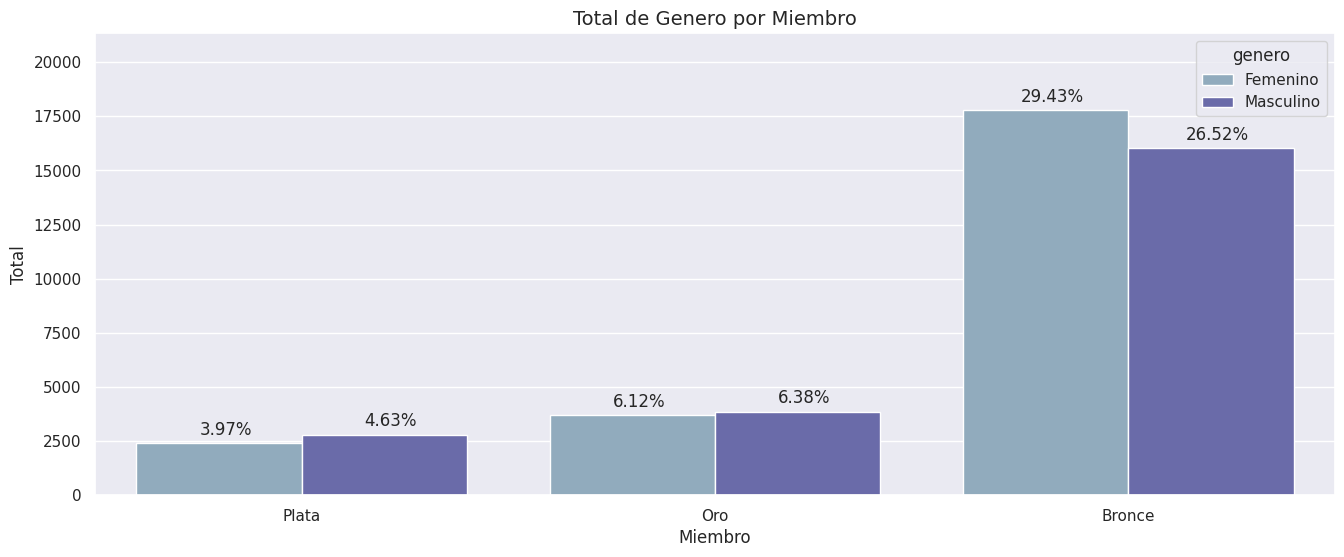

In [22]:
plot_count(datos, 'miembro', 'genero')

> De aqui podemos notar que para los tres tipos de miembros hay un equilibrio entre el género

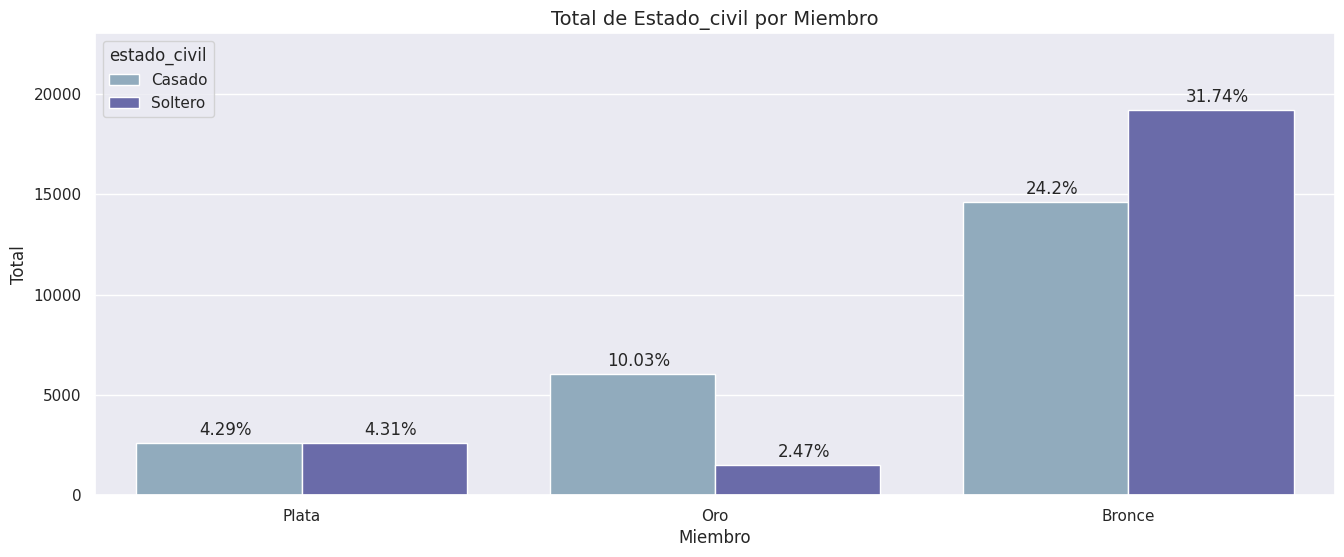

In [23]:
plot_count(datos, 'miembro', 'estado_civil')

> Notamos lo siguiente:
  * Los solteros(as) son los que mayor predominan en los miembros *bronce*.
  * Los casados son mayoria en los miembros *Oro*.
  * Hay un equilibrio entre casados y solteros en los miembros *Plata*.

#### Analizando por ingreso

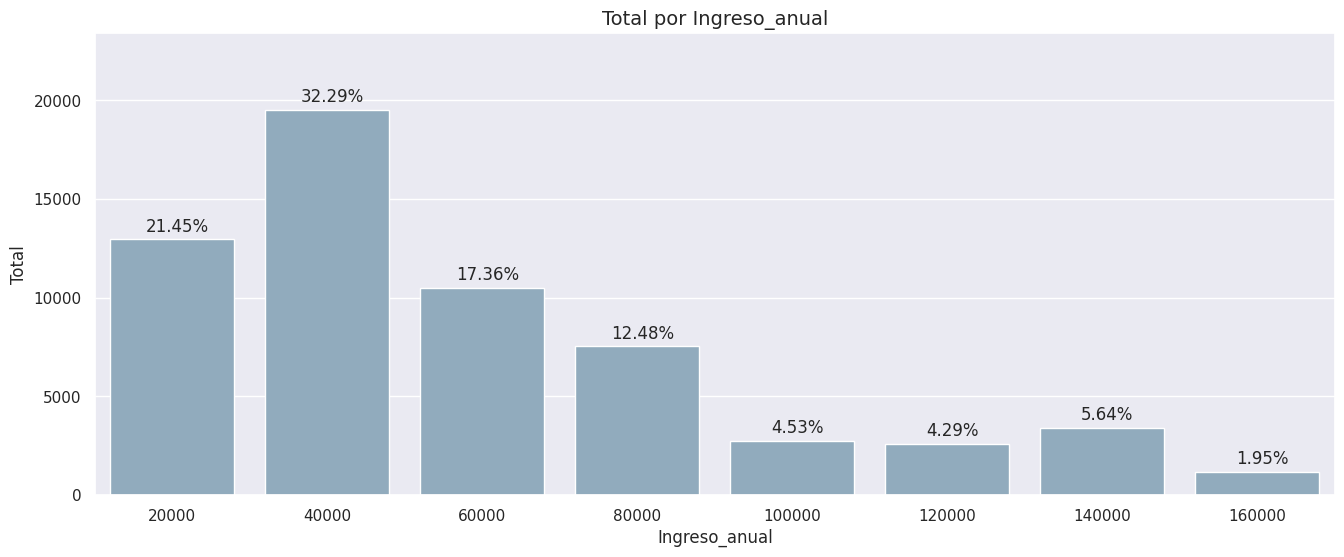

In [24]:
plot_count(datos, 'ingreso_anual')

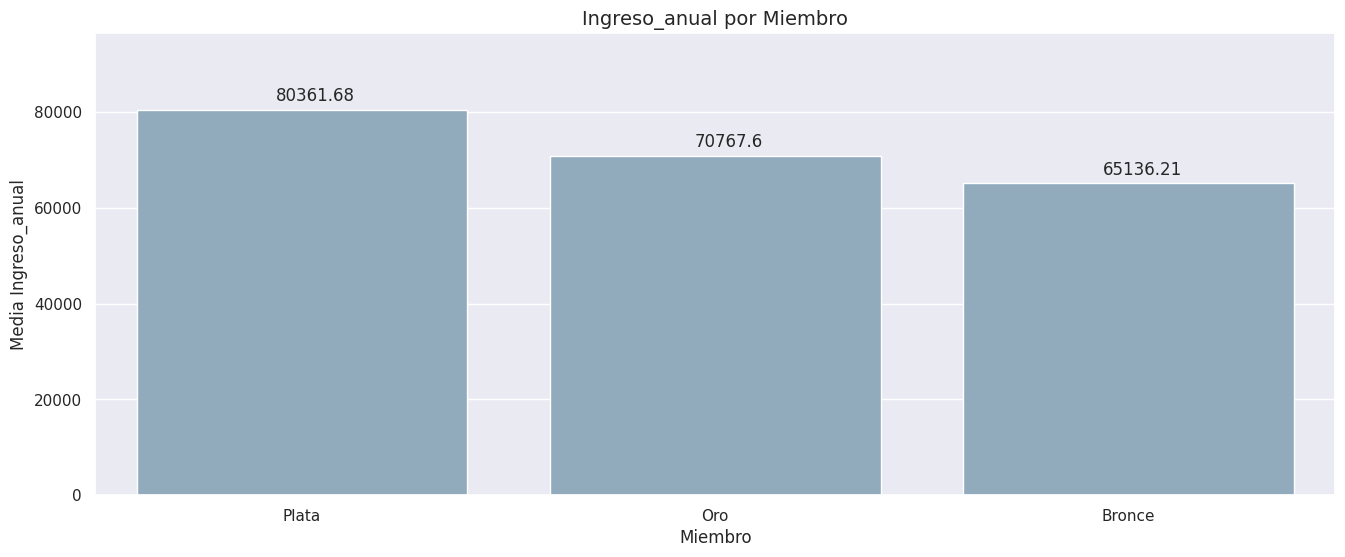

In [25]:
plot_ingreso(datos, x = 'miembro')

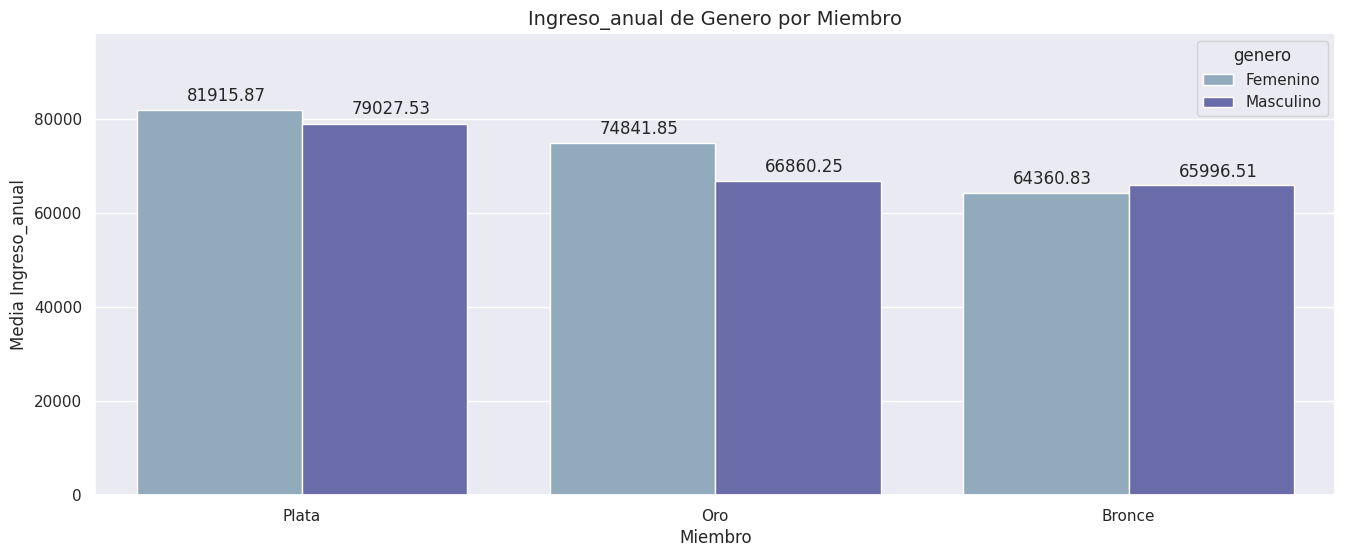

In [26]:
plot_ingreso(datos, x = 'miembro', hue = 'genero')

> Notamos que la media de la brecha salarial entre los dos géneros no es tan alta

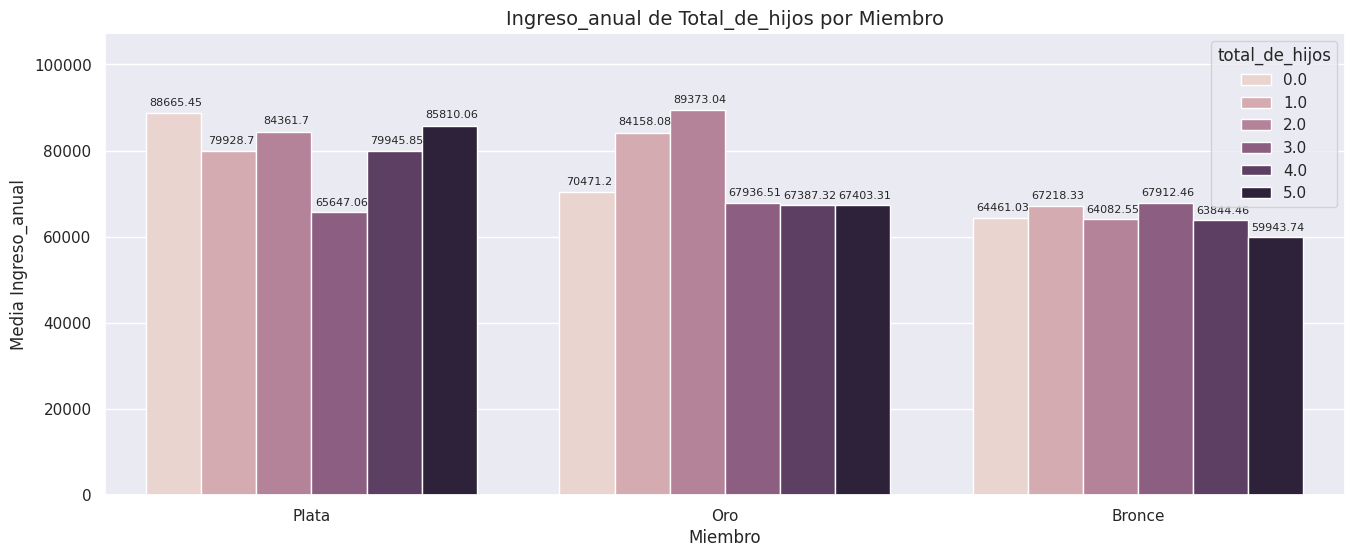

In [27]:
plot_ingreso(datos, x = 'miembro', hue = 'total_de_hijos', fs_per = 8)

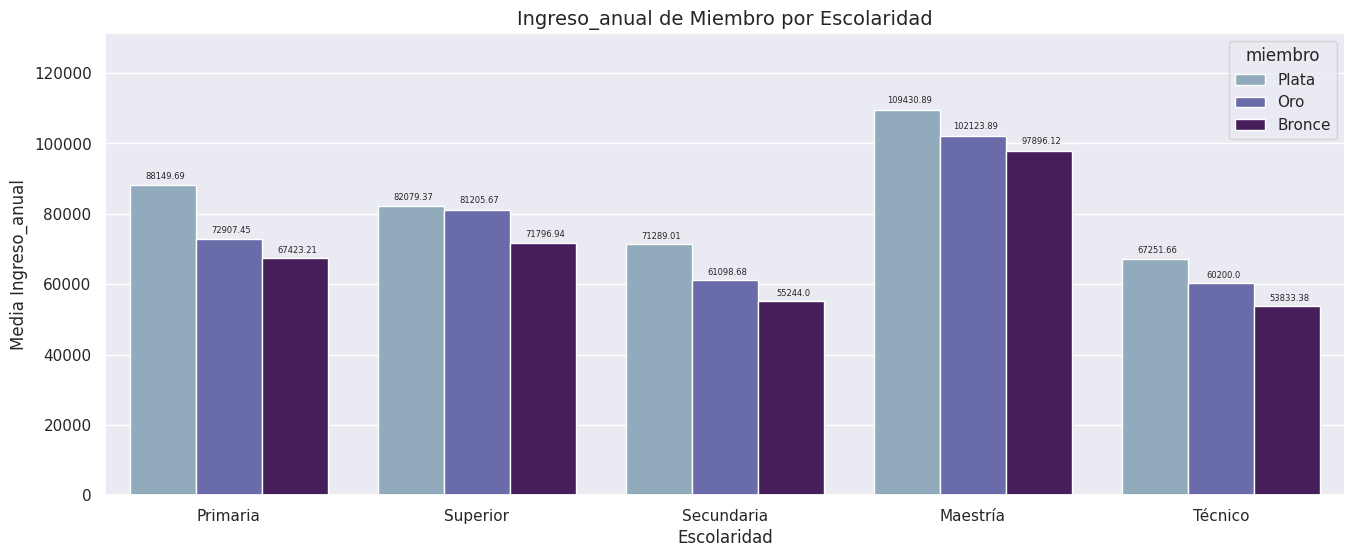

In [28]:
plot_ingreso(datos, x = 'escolaridad', hue = 'miembro', fs_per=6)

> Notamos que los salarios entre escolaridad son similares

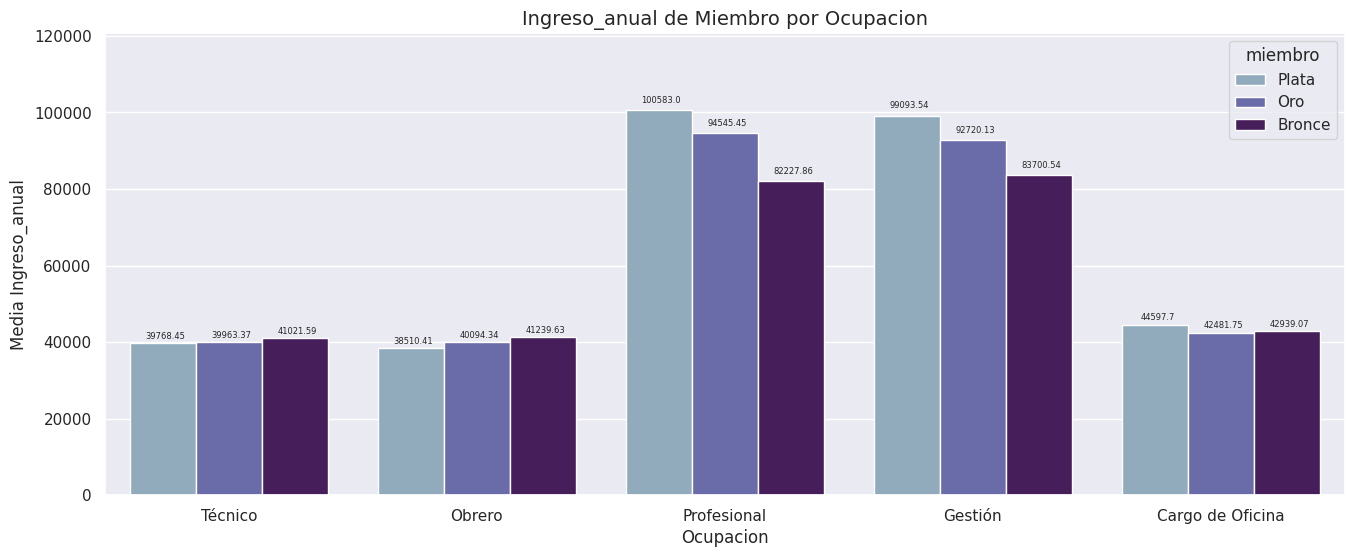

In [29]:
plot_ingreso(datos, x = 'ocupacion', hue = 'miembro', fs_per=6)

#### Analisis del tipo de tienda

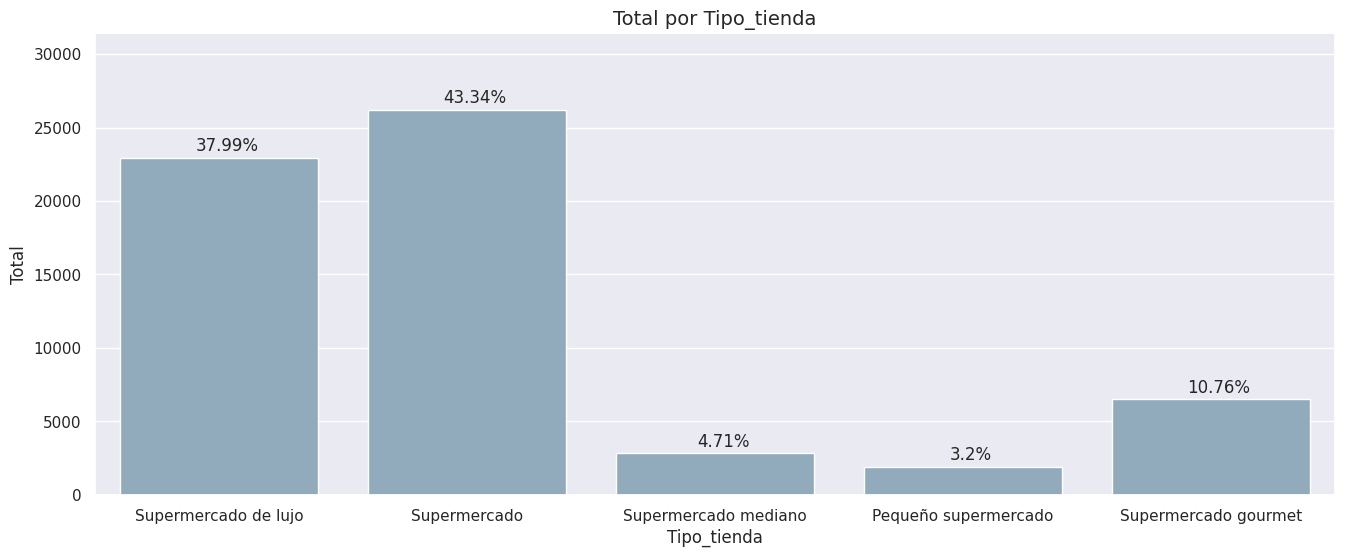

In [30]:
plot_count(datos, 'tipo_tienda')

> Notamos que hay dominancia en los tipos de tienda Supermecado de lujo y Supermercado

Ahora chequemos las ventas en millones de estas tiendas de estas tiendas

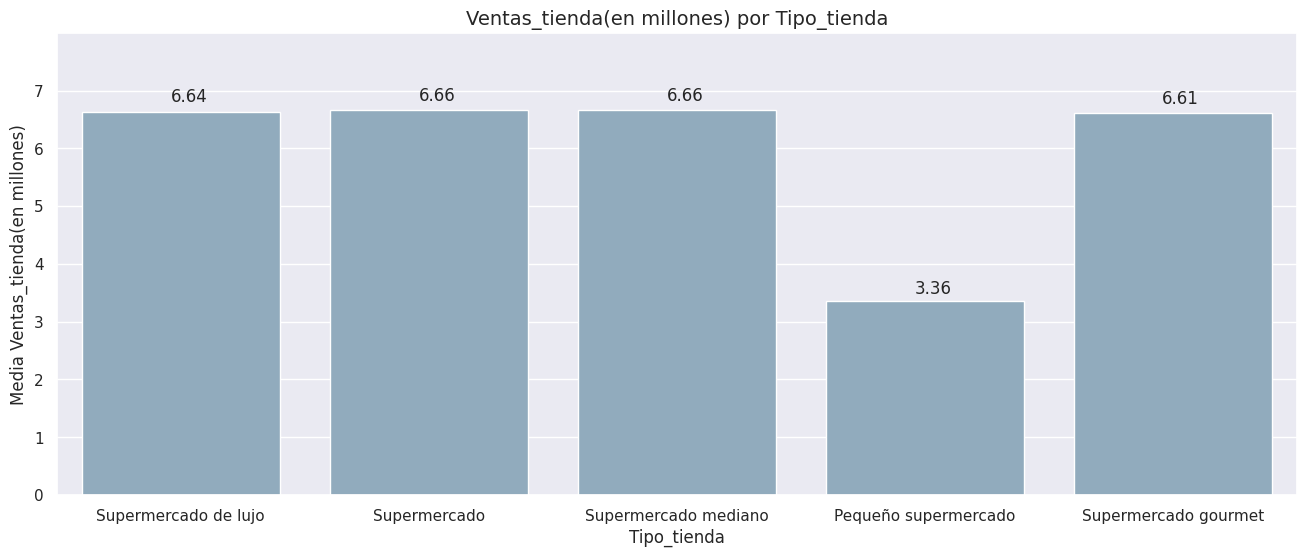

In [31]:
plot_ingreso(datos, x = 'tipo_tienda', y ='ventas_tienda(en millones)')

> Notamos que los *Pequeños Supermercados* son los que menor media de ventas.

Veamos la cantidad de miembros que tiene cada tipo de tienda

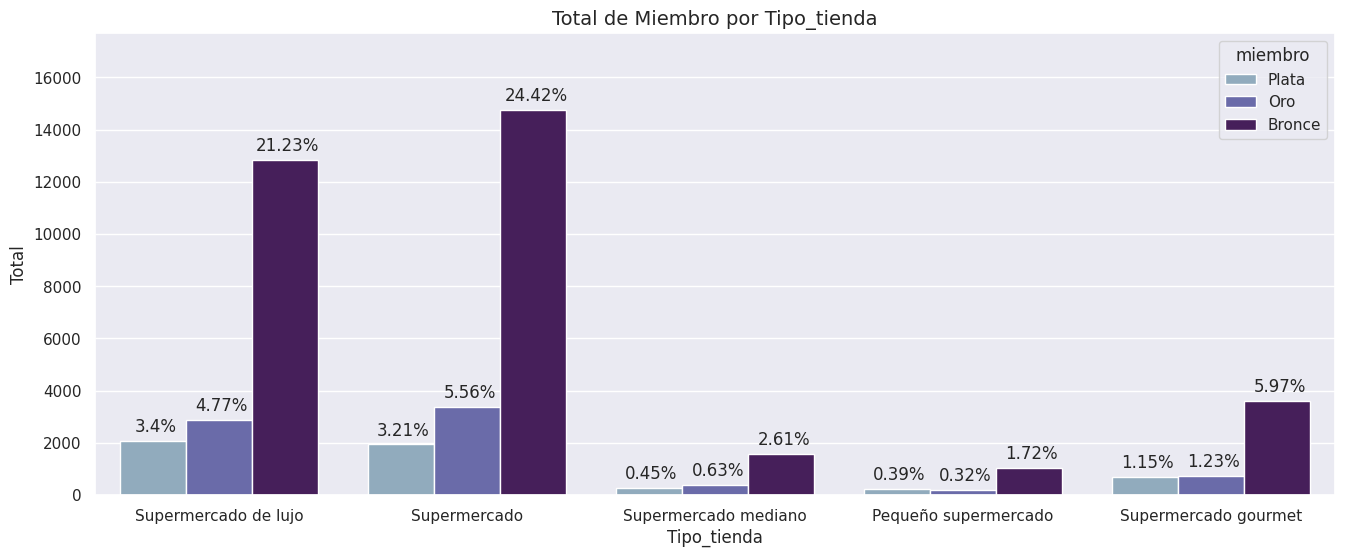

In [32]:
plot_count(datos, 'tipo_tienda', 'miembro')

> Como podemos ver los tipos de miembro Bronce predominan en los tres tipos de tienda

Finalmente chequemos la cantidad de tiendas por pais

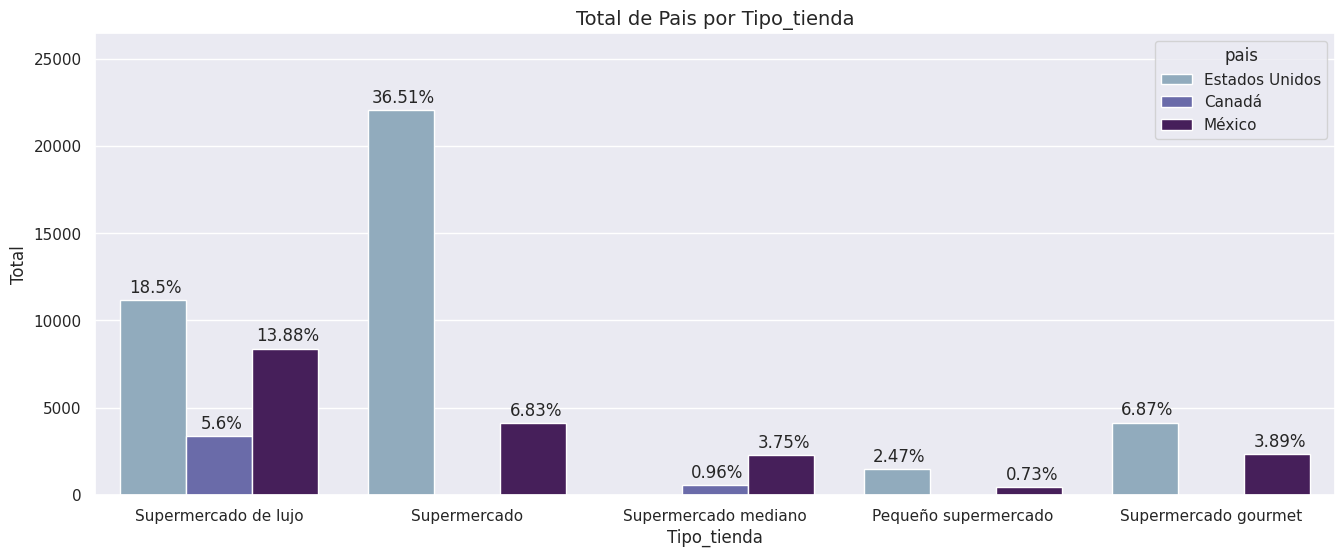

In [33]:
plot_count(datos, 'tipo_tienda', 'pais')

> Notamos que hay carencias de Supermercados en Canadá de tipo *Supermercado*, *Pequeño supermercado* y *Supermercado gourmet*

## <font  color = 'orange'>  4. Prepocesamiento de Datos y Obtención de Features </font>
---

### <font  color = 'orange'>  Seleccionando posibles variables para el procesamiento </font>


In [34]:
datos = pd.read_csv(path + 'datos_clientes.csv')

In [35]:
datos.head(3)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,hijos_en_casa,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,tipo_tienda,ciudad_tienda,estado_tienda,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo,ingreso_real
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,1.0,Primaria,NaN,Técnico,Sí,1.0,20000,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62,44520
1,Fruta,Productos frescos,Comida,1.68,0.8400,3.0,Rebajando precios,Canadá,Soltero,Femenino,1.0,Primaria,NaN,Obrero,Sí,1.0,20000,0.0,High Top,0.56,7.22,5.21,1.0,0.0,11.0,Supermercado de lujo,Vancouver,BC,23112.0,16418.0,4016.0,2678.0,1.0,1.0,1.0,1.0,1.0,Entrega en el punto de venta,122.77,40880
2,Fruta,Productos frescos,Comida,6.56,2.2304,4.0,Super Ahorradores,Canadá,Soltero,Femenino,3.0,Primaria,NaN,Técnico,No,0.0,20000,0.0,Hermanos,1.64,17.20,16.20,0.0,0.0,29.0,Supermercado de lujo,Vancouver,BC,23112.0,16418.0,4016.0,2678.0,1.0,1.0,1.0,1.0,1.0,Panfletos,51.00,38280


Por el momento almacenamos todas las variables categoricas que se encuentran en el conjunto de datos.

---
Veamos la cantidad de variables para cada variable categorica


In [186]:
variables_categoricas = datos.select_dtypes(include = 'object').columns.to_list()
def imprime_num_variable_categoricas():
  for var in variables_categoricas:
    print(f'Total de variables para la variable categorica "{var}": {len(set(datos[var].values))}')
imprime_num_variable_categoricas()

Total de variables para la variable categorica "categoria_alimento": 45
Total de variables para la variable categorica "departamento": 22
Total de variables para la variable categorica "tipo": 3
Total de variables para la variable categorica "promocion": 48
Total de variables para la variable categorica "pais": 3
Total de variables para la variable categorica "estado_civil": 2
Total de variables para la variable categorica "genero": 2
Total de variables para la variable categorica "escolaridad": 5
Total de variables para la variable categorica "miembro": 4
Total de variables para la variable categorica "ocupacion": 5
Total de variables para la variable categorica "vivienda_propia": 2
Total de variables para la variable categorica "marca": 111
Total de variables para la variable categorica "tipo_tienda": 5
Total de variables para la variable categorica "ciudad_tienda": 19
Total de variables para la variable categorica "estado_tienda": 10
Total de variables para la variable categorica "d

> Podriamos descartar las siguientes variables categoricas:
  * categoria alimento
  * departamento
  * promocion
  * marca
  * escolaridad (por no haber una brecha salarial muy fuerte)
  * ciudad_tienda (depende del estado)
  * estado_tienda (depende del pais)

In [188]:
# Aqui se seleccionaran aquellas variables numericas que parecen estar relacionadas al cliente y su compra
variables_numericas = ['ingreso_real']
# Variables categoricas que no se van a considerar
remover = ['categoria_alimento', 'marca', 'escolaridad',
           'ciudad_tienda', 'estado_tienda', 'divulgacion', 'genero', 'vivienda_propia',
           'estado_civil', 'pais', 'departamento', 'promocion']
for item in remover:
  if item in variables_categoricas:
    variables_categoricas.remove(item)
print(f'Total de variables categoricas: {len(variables_categoricas)}')

Total de variables categoricas: 4


In [189]:
imprime_num_variable_categoricas()

Total de variables para la variable categorica "tipo": 3
Total de variables para la variable categorica "miembro": 4
Total de variables para la variable categorica "ocupacion": 5
Total de variables para la variable categorica "tipo_tienda": 5


---
Creamos el DataFrame en el cual haremos el Encoding y posteriormente realizar la correspondiente segmentacion

In [190]:
variables = variables_numericas + variables_categoricas
print(f'Total de variables: {len(variables)}')
print(variables)

Total de variables: 5
['ingreso_real', 'tipo', 'miembro', 'ocupacion', 'tipo_tienda']


In [191]:
datos_segmento = datos[variables]
datos_segmento.head()

,ingreso_real,tipo,miembro,ocupacion,tipo_tienda
0,44520,Comida,NaN,Técnico,Supermercado de lujo
1,40880,Comida,NaN,Obrero,Supermercado de lujo
2,38280,Comida,NaN,Técnico,Supermercado de lujo
3,43710,Comida,NaN,Obrero,Supermercado de lujo
4,30855,Comida,NaN,Obrero,Supermercado de lujo


### <font  color = 'orange'> Nuevo mapeo, eliminacion de nulos y elementos repetidos.  </font>
---

Analicemos los hijos en casa.

In [192]:
# datos_segmento.hijos_en_casa.value_counts()

El mapeo a realizar es:
* 0 $\to$ Sin hijos en casa
* 1 $\to$ De uno a dos hijos en casa
* 2 $\to$ Más de 3 hijos en casa

In [193]:
'''hijos_en_casa = {0:0,
                 1:1,
                 2:1,
                 3:2,
                 4:2,
                 5:2}

datos_segmento['hijos_en_casa'] = datos_segmento['hijos_en_casa'].map(hijos_en_casa)
datos_segmento.hijos_en_casa.value_counts()'''

"hijos_en_casa = {0:0,\n                 1:1,\n                 2:1,\n                 3:2,\n                 4:2,\n                 5:2}\n\ndatos_segmento['hijos_en_casa'] = datos_segmento['hijos_en_casa'].map(hijos_en_casa)\ndatos_segmento.hijos_en_casa.value_counts()"

---
Reduzcamos los tipos de tienda de la siguiente manera:
<br>
Los tipos de tienda del tipo *Pequeño supermercado*, *Supermercado mediano* y *Supermercado Gourmet* serán clasificados en una sola categoria llamada *Supermercado versátil*.

In [194]:
# datos_segmento.tipo_tienda.value_counts()

In [195]:
''' stipo_tienda = {'Pequeño supermercado': 'Supermercado versátil',
               'Supermercado mediano': 'Supermercado versátil',
               'Supermercado': 'Supermercado',
               'Supermercado gourmet': 'Supermercado versátil',
               'Supermercado de lujo': 'Supermercado de lujo'}

datos_segmento['tipo_tienda'] = datos_segmento['tipo_tienda'].map(tipo_tienda)
datos_segmento.tipo_tienda.value_counts() '''

tipo_tienda
Supermercado             26192
Supermercado de lujo     22954
Supermercado versátil    11282
Name: count, dtype: int64

---
Eliminamos los elementos nulos antes del encoding

In [196]:
datos_segmento = datos_segmento.dropna(axis=0)
datos_segmento.shape[0]

46561

Tambien eliminamos filas repetidos

In [197]:
datos_segmento = datos_segmento.drop_duplicates()
datos_segmento.shape[0]

44635

In [198]:
datos_segmento = datos_segmento.sample(frac=1, random_state=1423).reset_index(drop=True)

In [199]:
datos_segmento.head()

,ingreso_real,tipo,miembro,ocupacion,tipo_tienda
0,86210,Comida,Plata,Gestión,Supermercado
1,68880,Bebida,Bronce,Profesional,Supermercado versátil
2,23015,No comestible,Bronce,Profesional,Supermercado de lujo
3,36815,Bebida,Oro,Profesional,Supermercado de lujo
4,61685,No comestible,Bronce,Profesional,Supermercado


In [200]:
datos_segmento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44635 entries, 0 to 44634
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ingreso_real  44635 non-null  int64 
 1   tipo          44635 non-null  object
 2   miembro       44635 non-null  object
 3   ocupacion     44635 non-null  object
 4   tipo_tienda   44635 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


### <font  color = 'orange'>  Codificación de Variables categoricas </font>


In [201]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [215]:
dict_encoding =  {'tipo': (0, datos_segmento.tipo.unique().tolist()),
                  #'departamento': (1, datos_segmento.departamento.unique().tolist()),
                  #'pais': (1,['México', 'Estados Unidos']),
                  'miembro': (0,['Bronce','Plata', 'Oro']),
                  'ocupacion': (1,['Obrero', 'Técnico','Cargo de Oficina','Gestión','Profesional']),
                  #'tipo_tienda': (0,[ 'Supermercado versátil', 'Supermercado', 'Supermercado de lujo']),
                  #'promocion': (1, datos_segmento.promocion.unique().tolist())
  }

> El valor 0 y 1 de la celda anterior representa los siguiente:
* 0 ----> One Hot Encoder
* 1 ----> Ordinal Encoder

In [216]:
def encoding_variables(dict_encoding):
  datos_segmento_copy = datos_segmento.copy()
  data_encoding = pd.DataFrame()
  for key, value in dict_encoding.items():
    encoder = OneHotEncoder(sparse_output=False).set_output(transform = 'pandas') if value[0] == 0 else OrdinalEncoder(categories=[value[1]]).set_output(transform = 'pandas')
    if value[0]!=0:
      data_encoding[key] = encoder.fit_transform(datos_segmento_copy[[key]])
    else:
      df_tmp = encoder.fit_transform(datos_segmento_copy[[key]])
      data_encoding = pd.concat([data_encoding, df_tmp], axis=1)
  return data_encoding

In [217]:
df_encoding = encoding_variables(dict_encoding)
df_encoding.sample(5)

,tipo_Bebida,tipo_Comida,tipo_No comestible,miembro_Bronce,miembro_Oro,miembro_Plata,ocupacion,tipo_tienda_Supermercado,tipo_tienda_Supermercado de lujo,tipo_tienda_Supermercado versátil
25665,0.0,1.0,0.0,1.0,0.0,0.0,4.0,1.0,0.0,0.0
39509,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
40397,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
6184,0.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0
15703,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0


In [218]:
datos_segmento_cp = datos_segmento.drop(columns=list(dict_encoding.keys()))
datos_encoding = pd.concat([datos_segmento_cp, df_encoding], axis=1, ignore_index=False).reset_index(drop=True)

Nos quedamos con los variables ya codificadas.

In [219]:
datos_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44635 entries, 0 to 44634
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ingreso_real                       44635 non-null  int64  
 1   tipo_Bebida                        44635 non-null  float64
 2   tipo_Comida                        44635 non-null  float64
 3   tipo_No comestible                 44635 non-null  float64
 4   miembro_Bronce                     44635 non-null  float64
 5   miembro_Oro                        44635 non-null  float64
 6   miembro_Plata                      44635 non-null  float64
 7   ocupacion                          44635 non-null  float64
 8   tipo_tienda_Supermercado           44635 non-null  float64
 9   tipo_tienda_Supermercado de lujo   44635 non-null  float64
 10  tipo_tienda_Supermercado versátil  44635 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 3.7 MB


In [220]:
datos_encoding.head()

,ingreso_real,tipo_Bebida,tipo_Comida,tipo_No comestible,miembro_Bronce,miembro_Oro,miembro_Plata,ocupacion,tipo_tienda_Supermercado,tipo_tienda_Supermercado de lujo,tipo_tienda_Supermercado versátil
0,86210,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0
1,68880,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0
2,23015,0.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0
3,36815,1.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0,0.0
4,61685,0.0,0.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,0.0


### Visualizando matriz de correlación


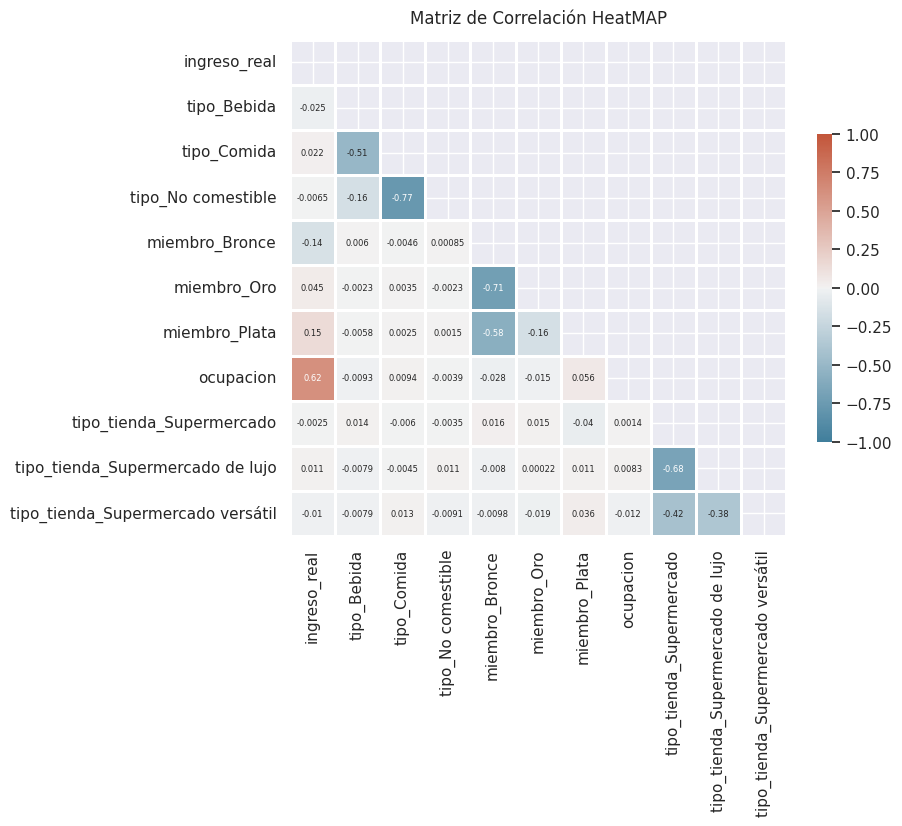

In [221]:
# Visualizando la matriz de correlacion entre las variables
columns = datos_encoding.columns.to_list()
corr = datos_encoding.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, vmin = -1,vmax=1, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5},annot=True,
                      annot_kws={"size": 6})

heatmap.set_title('Matriz de Correlación HeatMAP', fontdict={'fontsize':12}, pad=12);


### Estandarizando variables

Checamos las varianzas de cada uno de los atributos del dataset.

In [222]:
datos_encoding.describe().T[['std']]

,std
ingreso_real,42997.276134
tipo_Bebida,0.294534
tipo_Comida,0.455265
tipo_No comestible,0.397974
miembro_Bronce,0.450648
miembro_Oro,0.373419
miembro_Plata,0.320103
ocupacion,1.606067
tipo_tienda_Supermercado,0.494674
tipo_tienda_Supermercado de lujo,0.485567


> Notamos que la variable *Ingreso_real* tiene una desviacion estandar muy alta, mientras que los demas no.

In [223]:
from sklearn.preprocessing import StandardScaler, Normalizer
scaler = StandardScaler()
X_std  = scaler.fit_transform(datos_encoding.values)
X_std = pd.DataFrame(X_std, columns=datos_encoding.columns)
X_std.head()

,ingreso_real,tipo_Bebida,tipo_Comida,tipo_No comestible,miembro_Bronce,miembro_Oro,miembro_Plata,ocupacion,tipo_tienda_Supermercado,tipo_tienda_Supermercado de lujo,tipo_tienda_Supermercado versátil
0,0.506527,-0.325793,0.644176,-0.495796,-1.590200,-0.448542,2.761966,0.363000,1.157996,-0.784062,-0.487645
1,0.103473,3.069435,-1.552371,-0.495796,0.628852,-0.448542,-0.362061,0.985645,-0.863561,-0.784062,2.050670
2,-0.963234,-0.325793,-1.552371,2.016960,0.628852,-0.448542,-0.362061,0.985645,-0.863561,1.275410,-0.487645
3,-0.642280,3.069435,-1.552371,-0.495796,-1.590200,2.229448,-0.362061,0.985645,-0.863561,1.275410,-0.487645
4,-0.063865,-0.325793,-1.552371,2.016960,0.628852,-0.448542,-0.362061,0.985645,1.157996,-0.784062,-0.487645


In [224]:
X_std.describe().T[['std']]

,std
ingreso_real,1.000011
tipo_Bebida,1.000011
tipo_Comida,1.000011
tipo_No comestible,1.000011
miembro_Bronce,1.000011
miembro_Oro,1.000011
miembro_Plata,1.000011
ocupacion,1.000011
tipo_tienda_Supermercado,1.000011
tipo_tienda_Supermercado de lujo,1.000011


## <font  color = 'orange'> 5. Clusterización y validación  </font>
---

In [225]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import warnings
warnings.filterwarnings("ignore")

### Validación

In [226]:
scores = []
for i in range(3,11):
  score = {}
  clusters = KMeans(n_clusters=i, random_state=42, n_init =10, max_iter=300)
  clusters.fit(X=X_std)
  labels = clusters.labels_
  score['n_clusters'] = i
  score['Inercia'] = clusters.inertia_
  score['Silhouette'] = silhouette_score(X_std, labels, metric = 'euclidean')
  score['Davies-Bouldin'] = davies_bouldin_score(X_std, labels)
  score['Calinski-Harabasz'] = calinski_harabasz_score(X_std, labels)
  scores.append(score)

cluster_scores = pd.DataFrame(scores)
cluster_scores

,n_clusters,Inercia,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,348605.342709,0.247498,1.768332,9114.445600
1,4,310780.022013,0.233255,1.628585,8626.389303
2,5,256044.882055,0.328721,1.281830,10237.846885
3,6,219985.167123,0.314741,1.216330,10995.701709
4,7,188243.838788,0.370552,1.099194,11962.084770
5,8,176595.459931,0.365290,1.036869,11349.800316
6,9,165198.632468,0.406022,1.122598,11000.804169
7,10,154554.515266,0.411670,1.062133,10793.197332


<Axes: xlabel='n_clusters', ylabel='Inercia'>

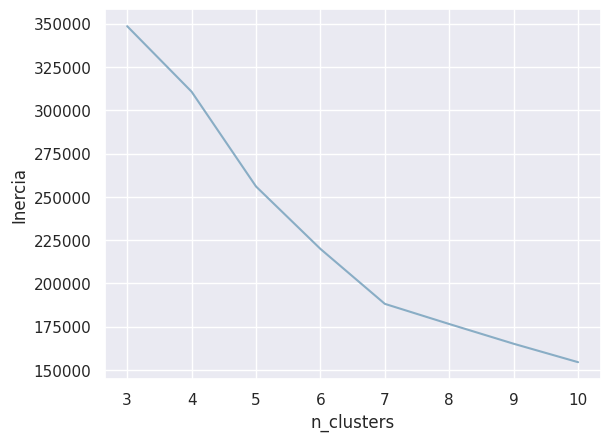

In [227]:
sns.lineplot(data=cluster_scores, x='n_clusters', y='Inercia')